In [1]:
# Q1Write a Python program to perform a Z-test for comparing a sample mean to a known population mean and interpret the results.?
import numpy as np
from scipy.stats import norm

# Sample data
sample = np.array([55, 60, 65, 62, 58, 64, 59, 63, 61, 60])

# Known population mean and standard deviation
population_mean = 60
population_std = 5

# Sample statistics
sample_mean = np.mean(sample)
sample_size = len(sample)

# Z-test statistic
z_score = (sample_mean - population_mean) / (population_std / np.sqrt(sample_size))

# P-value (two-tailed test)
p_value = 2 * (1 - norm.cdf(abs(z_score)))

# Output the results
print("Sample Mean:", round(sample_mean, 2))
print("Z-Score:", round(z_score, 3))
print("P-Value:", round(p_value, 4))

# Interpretation
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: The sample mean is significantly different from the population mean.")
else:
    print("Fail to reject the null hypothesis: No significant difference between sample and population mean.")


Sample Mean: 60.7
Z-Score: 0.443
P-Value: 0.658
Fail to reject the null hypothesis: No significant difference between sample and population mean.


In [3]:
#Q2 Simulate random data to perform hypothesis testing and calculate the corresponding P-value using Python?
import numpy as np
from scipy import stats

# Step 1: Simulate random sample data
np.random.seed(42)
sample_size = 50
population_mean = 100
population_std = 15
sample_data = np.random.normal(loc=105, scale=15, size=sample_size)

# Step 2: Calculate sample mean
sample_mean = np.mean(sample_data)

# Step 3: Perform one-sample Z-test (assume population std is known)
z_score = (sample_mean - population_mean) / (population_std / np.sqrt(sample_size))

# Step 4: Calculate the P-value (two-tailed test)
p_value = 2 * (1 - stats.norm.cdf(abs(z_score)))

# Step 5: Print results
print("Sample Mean:", sample_mean)
print("Z-Score:", z_score)
print("P-Value:", p_value)

# Step 6: Interpret results
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant difference.")
else:
    print("Fail to reject the null hypothesis: No significant difference.")

 

Sample Mean: 101.61789142115789
Z-Score: 0.7626813300828578
P-Value: 0.44565346759081104
Fail to reject the null hypothesis: No significant difference.


In [6]:
#Q3 Implement a one-sample Z-test using Python to compare the sample mean with the population mean?
import numpy as np
from scipy import stats

# Sample data (example: test scores of students)
sample_data = [78, 85, 90, 88, 76, 95, 89, 84, 91, 87]

# Known population mean
population_mean = 85

# Step 1: Calculate sample mean and standard deviation
sample_mean = np.mean(sample_data)
sample_std = np.std(sample_data, ddof=1)  # sample standard deviation
n = len(sample_data)

# Step 2: Compute Z-score
z_score = (sample_mean - population_mean) / (sample_std / np.sqrt(n))

# Step 3: Compute p-value
p_value = 2 * (1 - stats.norm.cdf(abs(z_score)))  # two-tailed test

# Step 4: Output the results
print("Sample Mean:", sample_mean)
print("Z-Score:", z_score)
print("P-Value:", p_value)

Sample Mean: 86.3
Z-Score: 0.7072230338435068
P-Value: 0.4794278865548476


Z statistic: 3.20
Critical Z values: ±1.96
P-value: 0.0014
Reject the null hypothesis (significant difference).


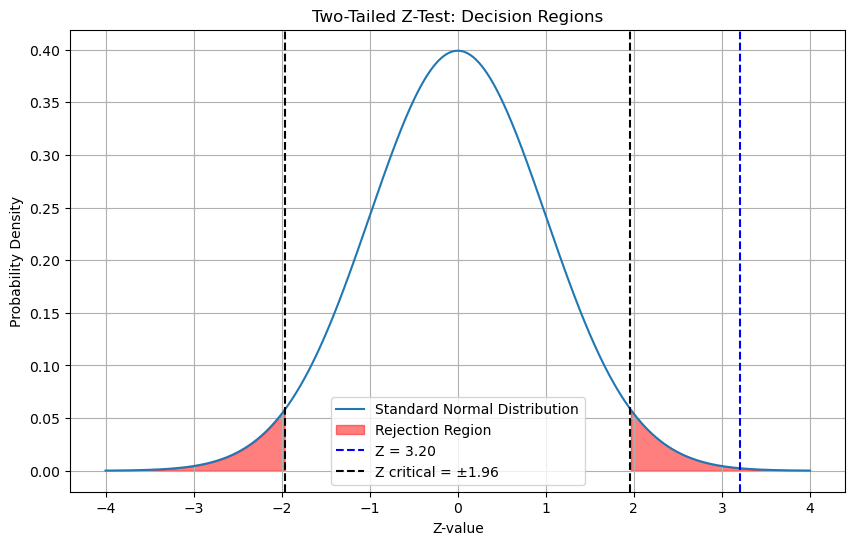

In [5]:
#Q4 Perform a two-tailed Z-test using Python and visualize the decision region on a plot.?
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

# Given data
mu = 100          # Population mean
sigma = 15        # Population standard deviation
x_bar = 108       # Sample mean
n = 36            # Sample size
alpha = 0.05      # Significance level

# Step 1: Calculate the Z statistic
z = (x_bar - mu) / (sigma / np.sqrt(n))
print(f"Z statistic: {z:.2f}")

# Step 2: Critical Z values for two-tailed test
z_critical = stats.norm.ppf(1 - alpha / 2)
print(f"Critical Z values: ±{z_critical:.2f}")

# Step 3: P-value
p_value = 2 * (1 - stats.norm.cdf(abs(z)))
print(f"P-value: {p_value:.4f}")

# Step 4: Conclusion
if abs(z) > z_critical:
    print("Reject the null hypothesis (significant difference).")
else:
    print("Fail to reject the null hypothesis (no significant difference).")

# Step 5: Visualization
x = np.linspace(-4, 4, 1000)
y = stats.norm.pdf(x)

plt.figure(figsize=(10, 6))
plt.plot(x, y, label='Standard Normal Distribution')

# Shade the rejection regions
plt.fill_between(x, 0, y, where=(x <= -z_critical), color='red', alpha=0.5, label='Rejection Region')
plt.fill_between(x, 0, y, where=(x >= z_critical), color='red', alpha=0.5)

# Plot the Z statistic
plt.axvline(z, color='blue', linestyle='--', label=f'Z = {z:.2f}')
plt.axvline(-z_critical, color='black', linestyle='--', label=f'Z critical = ±{z_critical:.2f}')
plt.axvline(z_critical, color='black', linestyle='--')

plt.title("Two-Tailed Z-Test: Decision Regions")
plt.xlabel("Z-value")
plt.ylabel("Probability Density")
plt.legend()
plt.grid(True)
plt.show()


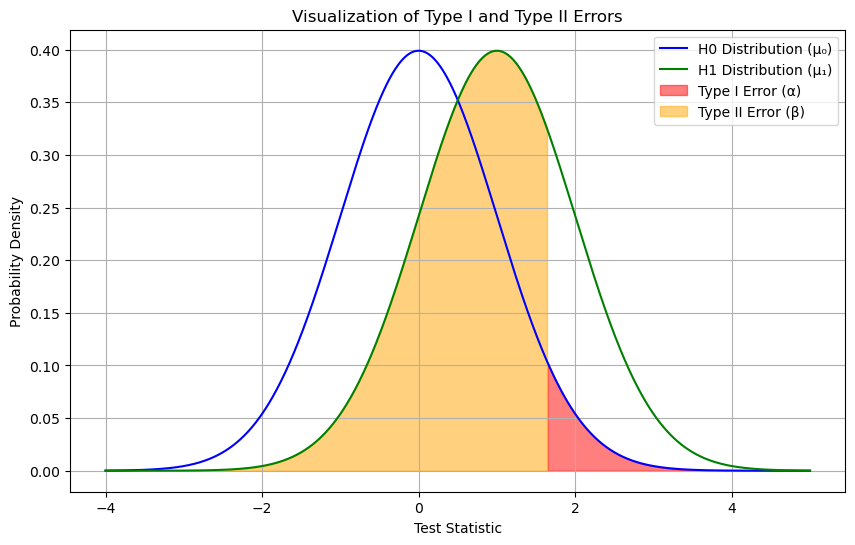

Type II Error Probability (β): 0.7405


In [8]:
#Q5. Create a Pythen functionthat calculates and visualizes Type I and Type 2 errors during hypothesis testing.?
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

def visualize_type1_type2(mu0=0, mu1=1, sigma=1, alpha=0.05, tail='right'):
    """
    Visualize Type I and Type II Errors in hypothesis testing.
    
    Parameters:
    - mu0: Mean under null hypothesis (H0)
    - mu1: Mean under alternative hypothesis (H1)
    - sigma: Standard deviation (assumed same under H0 and H1)
    - alpha: Significance level (Type I error probability)
    - tail: 'right', 'left', or 'two' for one or two-tailed test
    """

    # Define x values
    x = np.linspace(mu0 - 4*sigma, mu1 + 4*sigma, 1000)
    y0 = norm.pdf(x, mu0, sigma)  # H0 curve
    y1 = norm.pdf(x, mu1, sigma)  # H1 curve

    # Find critical value(s)
    if tail == 'right':
        z_alpha = norm.ppf(1 - alpha)
        crit_value = mu0 + z_alpha * sigma
        beta = norm.cdf((crit_value - mu1) / sigma)
    elif tail == 'left':
        z_alpha = norm.ppf(alpha)
        crit_value = mu0 + z_alpha * sigma
        beta = 1 - norm.cdf((crit_value - mu1) / sigma)
    elif tail == 'two':
        z_alpha = norm.ppf(1 - alpha / 2)
        crit_low = mu0 - z_alpha * sigma
        crit_high = mu0 + z_alpha * sigma
        beta = norm.cdf((crit_high - mu1) / sigma) - norm.cdf((crit_low - mu1) / sigma)

    # Plotting
    plt.figure(figsize=(10, 6))
    plt.plot(x, y0, label='H0 Distribution (μ₀)', color='blue')
    plt.plot(x, y1, label='H1 Distribution (μ₁)', color='green')

    # Shade Type I error (α)
    if tail == 'right':
        x_alpha = x[x > crit_value]
        plt.fill_between(x_alpha, 0, norm.pdf(x_alpha, mu0, sigma), color='red', alpha=0.5, label='Type I Error (α)')
    elif tail == 'left':
        x_alpha = x[x < crit_value]
        plt.fill_between(x_alpha, 0, norm.pdf(x_alpha, mu0, sigma), color='red', alpha=0.5, label='Type I Error (α)')
    elif tail == 'two':
        x_alpha_low = x[x < crit_low]
        x_alpha_high = x[x > crit_high]
        plt.fill_between(x_alpha_low, 0, norm.pdf(x_alpha_low, mu0, sigma), color='red', alpha=0.5)
        plt.fill_between(x_alpha_high, 0, norm.pdf(x_alpha_high, mu0, sigma), color='red', alpha=0.5, label='Type I Error (α)')

    # Shade Type II error (β)
    if tail == 'right':
        x_beta = x[x < crit_value]
        plt.fill_between(x_beta, 0, norm.pdf(x_beta, mu1, sigma), color='orange', alpha=0.5, label='Type II Error (β)')
    elif tail == 'left':
        x_beta = x[x > crit_value]
        plt.fill_between(x_beta, 0, norm.pdf(x_beta, mu1, sigma), color='orange', alpha=0.5, label='Type II Error (β)')
    elif tail == 'two':
        x_beta = x[(x > crit_low) & (x < crit_high)]
        plt.fill_between(x_beta, 0, norm.pdf(x_beta, mu1, sigma), color='orange', alpha=0.5, label='Type II Error (β)')

    # Final plot setup
    plt.title('Visualization of Type I and Type II Errors')
    plt.xlabel('Test Statistic')
    plt.ylabel('Probability Density')
    plt.legend()
    plt.grid(True)
    plt.show()

    # Print calculated beta
    print(f"Type II Error Probability (β): {beta:.4f}")

# Example usage:
visualize_type1_type2(mu0=0, mu1=1, sigma=1, alpha=0.05, tail='right')


In [9]:
#Q6. Write a Python program to perform an independent T-test and interpret the resulis.?
import numpy as np
from scipy import stats

# Sample data for two independent groups
group1 = [23, 25, 22, 30, 28, 27, 31]
group2 = [31, 33, 29, 36, 30, 35, 32]

# Perform Independent T-Test
t_statistic, p_value = stats.ttest_ind(group1, group2)

# Print the results
print("T-statistic:", t_statistic)
print("P-value:", p_value)

# Interpretation
alpha = 0.05  # significance level
if p_value < alpha:
    print("Result: Reject the null hypothesis. There is a significant difference between the two groups.")
else:
    print("Result: Fail to reject the null hypothesis. No significant difference between the two groups.")


T-statistic: -3.5447771476043455
P-value: 0.004035215611194767
Result: Reject the null hypothesis. There is a significant difference between the two groups.


T-statistic: -11.727
P-value: 0.000


C:\Users\lalit\AppData\Local\Temp\ipykernel_1076\3165426202.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Condition', y='Score', data=df_melted, palette='Set2')


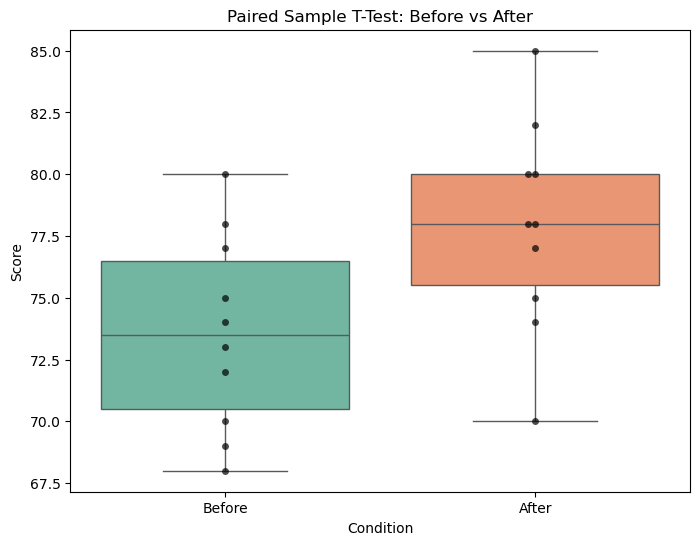

In [10]:
#Q7. Pertorm a paired sample T-test using Python and visualize the comparison results..?
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

# Create Sample Data
# Example: student scores before and after training
before = np.array([70, 68, 75, 80, 72, 78, 69, 74, 77, 73])
after  = np.array([75, 70, 80, 85, 78, 82, 74, 78, 80, 77])

t_stat, p_value = stats.ttest_rel(before, after)

print(f"T-statistic: {t_stat:.3f}")
print(f"P-value: {p_value:.3f}")

# Perform Paired T-Test
# Combine data for seaborn plot
df = pd.DataFrame({
    'Before': before,
    'After': after
})

#Visualize the Results
# Melt the data for seaborn
df_melted = df.melt(var_name='Condition', value_name='Score')

# Plot
plt.figure(figsize=(8, 6))
sns.boxplot(x='Condition', y='Score', data=df_melted, palette='Set2')
sns.swarmplot(x='Condition', y='Score', data=df_melted, color='black', alpha=0.7)
plt.title('Paired Sample T-Test: Before vs After')
plt.show()


In [11]:
#Q8. Simulate data and perform both Z-test and T-test, then compare the results using Python..?
import numpy as np
import scipy.stats as stats

# 1. Simulate sample data
np.random.seed(42)
sample_size = 30
population_mean = 50
population_std = 10

# Simulate a sample from a normal distribution
sample = np.random.normal(loc=population_mean, scale=population_std, size=sample_size)

# Hypothesized mean
mu_0 = 52

# 2. Z-test
# For Z-test, we assume population std is known
z_stat = (np.mean(sample) - mu_0) / (population_std / np.sqrt(sample_size))
p_value_z = 2 * (1 - stats.norm.cdf(abs(z_stat)))

# 3. T-test
# For T-test, we assume population std is unknown
t_stat, p_value_t = stats.ttest_1samp(sample, mu_0)

# 4. Print Results
print("Sample Mean:", np.mean(sample))
print("Z-test Statistic:", z_stat)
print("Z-test p-value:", p_value_z)

print("\nT-test Statistic:", t_stat)
print("T-test p-value:", p_value_t)


Sample Mean: 48.118531041489625
Z-test Statistic: -2.125968104832216
Z-test p-value: 0.033505915369502315

T-test Statistic: -2.3621699135729086
T-test p-value: 0.025094491006129416


In [16]:
#Q9 Write a Python function to calculate the confidence interval for a sample mean and explain its significance.?
import numpy as np
from scipy import stats

def confidence_interval(data, confidence=0.95):
    # Convert data to NumPy array
    data = np.array(data)
    
    # Sample statistics
    n = len(data)
    mean = np.mean(data)
    sem = stats.sem(data)  # Standard error of the mean
    
    # t-score for given confidence level
    t_score = stats.t.ppf((1 + confidence) / 2.0, df=n-1)
    
    # Margin of error
    margin_of_error = t_score * sem
    
    # Confidence interval
    lower_bound = mean - margin_of_error
    upper_bound = mean + margin_of_error
    
    return (lower_bound, upper_bound)

sample_data = [50, 52, 48, 47, 51, 49, 53]
ci = confidence_interval(sample_data, confidence=0.95)
print("95% Confidence Interval:", ci)


95% Confidence Interval: (48.0021048397086, 51.9978951602914)


In [17]:
#Q10. Writo a Python program to calculato the margin of orror for a gívon contidenco lovol using samplo data.?
import math
import scipy.stats as stats

# Sample data
sample_mean = 50          # Sample mean
sample_std_dev = 10       # Sample standard deviation
sample_size = 100         # Sample size
confidence_level = 0.95   # Confidence level (e.g., 95%)

# Calculate standard error
standard_error = sample_std_dev / math.sqrt(sample_size)

# Find the Z-score for the confidence level
z_score = stats.norm.ppf((1 + confidence_level) / 2)

# Calculate margin of error
margin_of_error = z_score * standard_error

# Output result
print(f"Sample Mean: {sample_mean}")
print(f"Confidence Level: {confidence_level * 100}%")
print(f"Margin of Error: {margin_of_error:.2f}")


Sample Mean: 50
Confidence Level: 95.0%
Margin of Error: 1.96


In [18]:
#Q1I. Implement a Bayeslan inference method using Bayes' Theorem in Python and explain the process
# Step 1: Define the probabilities
P_disease = 0.01              # Prior: P(H)
P_no_disease = 0.99           # Complement of prior
P_positive_given_disease = 0.99   # Likelihood: P(D|H)
P_positive_given_no_disease = 0.05

# Step 2: Calculate total probability of a positive test (Evidence)
P_positive = (P_positive_given_disease * P_disease) + \
             (P_positive_given_no_disease * P_no_disease)

# Step 3: Apply Bayes' Theorem to find P(Disease | Positive)
P_disease_given_positive = (P_positive_given_disease * P_disease) / P_positive

# Print result
print(f"Probability of having the disease given a positive test: {P_disease_given_positive:.4f}")






Probability of having the disease given a positive test: 0.1667


In [19]:
#Q12. Perform a Chi-square test for independence between two categorical variables in Python.?
import pandas as pd
from scipy.stats import chi2_contingency

# Step 1: Create the contingency table
data = [[30, 20],  # Male: Tea, Coffee
        [20, 30]]  # Female: Tea, Coffee

table = pd.DataFrame(data, columns=["Tea", "Coffee"], index=["Male", "Female"])

# Step 2: Perform the Chi-square test
chi2, p, dof, expected = chi2_contingency(table)

# Step 3: Print the results
print("Chi-square Statistic:", chi2)
print("Degrees of Freedom:", dof)
print("P-value:", p)
print("Expected Frequencies:\n", expected)

# Step 4: Interpret the result
alpha = 0.05
if p < alpha:
    print("❌ Reject the null hypothesis: There IS a relationship between Gender and Preference.")
else:
    print("✅ Fail to reject the null hypothesis: NO relationship between Gender and Preference.")


Chi-square Statistic: 3.24
Degrees of Freedom: 1
P-value: 0.07186063822585143
Expected Frequencies:
 [[25. 25.]
 [25. 25.]]
✅ Fail to reject the null hypothesis: NO relationship between Gender and Preference.


In [20]:
#Q13. Write a Python program to calculato the expocted froquencios for a Chi-squarc test basod on obsorved data.?
import numpy as np
import pandas as pd

# Sample observed data (2D list or NumPy array)
observed = np.array([
    [30, 10],
    [20, 40]
])

# Convert to DataFrame for readability (optional)
observed_df = pd.DataFrame(observed, columns=["Category A", "Category B"], index=["Group 1", "Group 2"])

# Calculate row totals and column totals
row_totals = observed.sum(axis=1).reshape(-1, 1)
col_totals = observed.sum(axis=0).reshape(1, -1)
grand_total = observed.sum()

# Calculate expected frequencies
expected = (row_totals @ col_totals) / grand_total

# Display results
expected_df = pd.DataFrame(expected, columns=["Category A", "Category B"], index=["Group 1", "Group 2"])

print("Observed Frequencies:\n", observed_df)
print("\nExpected Frequencies:\n", expected_df)


Observed Frequencies:
          Category A  Category B
Group 1          30          10
Group 2          20          40

Expected Frequencies:
          Category A  Category B
Group 1        20.0        20.0
Group 2        30.0        30.0


In [23]:
#Q14. Perform a goodness-of-fit test using Python to compare the observed data to an expected distribution.
import scipy.stats as stats
import numpy as np

# Observed data (e.g., number of visitors per day in a week)
observed = np.array([120, 130, 115, 140, 110, 125, 130])

# Expected data (e.g., uniform distribution across the week)
expected = np.full_like(observed, fill_value=np.mean(observed))

# Perform Chi-Square Goodness-of-Fit test
chi_stat, p_value = stats.chisquare(f_obs=observed, f_exp=expected)

# Output results
print("Chi-Square Statistic:", chi_stat)
print("p-value:", p_value)

# Interpretation
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: Observed data does not fit expected distribution.")
else:
    print("Fail to reject the null hypothesis: Observed data fits expected distribution.")


ValueError: For each axis slice, the sum of the observed frequencies must agree with the sum of the expected frequencies to a relative tolerance of 1e-08, but the percent differences are:
0.002304147465437788

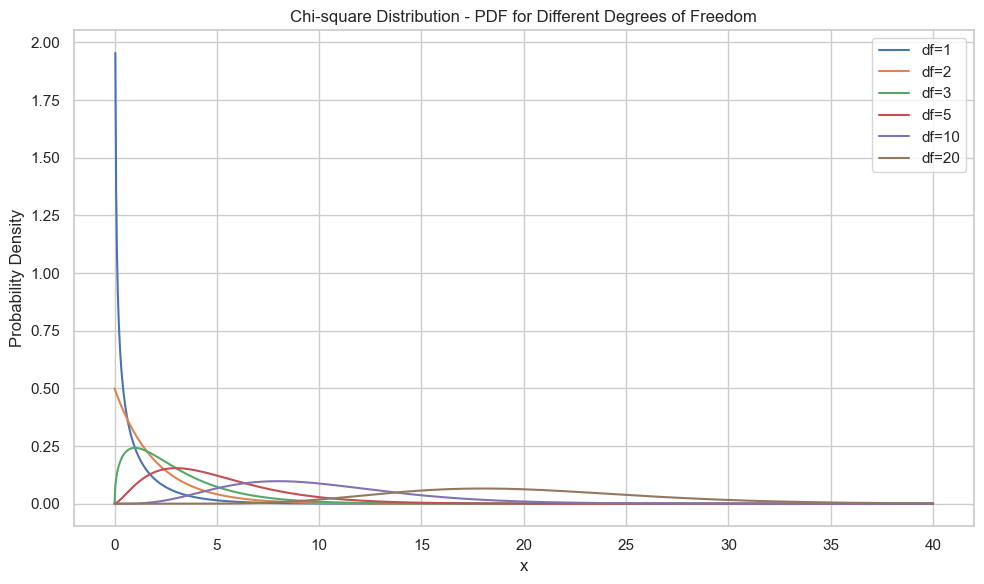

In [24]:
#Q15. Croate a Python script to simulato and visualize tho Chi-square dístribution and discuss its characteristics.
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2

# Set seaborn style
sns.set(style="whitegrid")

# Degrees of freedom (df) to visualize
dfs = [1, 2, 3, 5, 10, 20]

# Create x values
x = np.linspace(0, 40, 1000)

# Plot Chi-square PDFs for different degrees of freedom
plt.figure(figsize=(10, 6))
for df in dfs:
    plt.plot(x, chi2.pdf(x, df), label=f'df={df}')

plt.title('Chi-square Distribution - PDF for Different Degrees of Freedom')
plt.xlabel('x')
plt.ylabel('Probability Density')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [25]:
#Q16. Implement an F-test using Python to compare the variances of two random samples.?
import numpy as np
from scipy.stats import f

# Example samples
sample1 = np.random.normal(loc=50, scale=10, size=30)
sample2 = np.random.normal(loc=55, scale=15, size=35)

# Sample sizes
n1 = len(sample1)
n2 = len(sample2)

# Sample variances
var1 = np.var(sample1, ddof=1)  # ddof=1 for sample variance
var2 = np.var(sample2, ddof=1)

# F-statistic
F = var1 / var2 if var1 > var2 else var2 / var1

# Degrees of freedom
df1 = n1 - 1
df2 = n2 - 1

# Two-tailed p-value
p_value = 2 * (1 - f.cdf(F, df1, df2)) if var1 > var2 else 2 * f.cdf(F, df1, df2)

# Print results
print("Sample Variance 1:", var1)
print("Sample Variance 2:", var2)
print("F-statistic:", F)
print("Degrees of Freedom:", df1, df2)
print("P-value:", p_value)

# Conclusion
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: Variances are significantly different.")
else:
    print("Fail to reject the null hypothesis: No significant difference in variances.")


Sample Variance 1: 86.69513027997485
Sample Variance 2: 200.1409498427559
F-statistic: 2.308560460044492
Degrees of Freedom: 29 34
P-value: 1.9798600513762763
Fail to reject the null hypothesis: No significant difference in variances.


In [26]:
#Q17. Write a Python program to perform an ANOVA test to compare means between multiple groups and Interpret the results.?
import scipy.stats as stats

# Sample data: scores from 3 different teaching methods
group_A = [85, 90, 88, 75, 95]
group_B = [70, 65, 80, 60, 75]
group_C = [88, 85, 84, 90, 87]

# Perform One-Way ANOVA
f_statistic, p_value = stats.f_oneway(group_A, group_B, group_C)

# Print the results
print("ANOVA Results:")
print(f"F-Statistic: {f_statistic:.4f}")
print(f"P-Value: {p_value:.4f}")

# Interpretation
alpha = 0.05
if p_value < alpha:
    print("\n✅ Result: There is a significant difference between the group means (reject H0).")
else:
    print("\n❌ Result: There is no significant difference between the group means (fail to reject H0).")



ANOVA Results:
F-Statistic: 11.2923
P-Value: 0.0017

✅ Result: There is a significant difference between the group means (reject H0).


F-Statistic: 21.55482166446499
P-Value: 1.6690325461914876e-05


C:\Users\lalit\AppData\Local\Temp\ipykernel_1076\3298235890.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=groups, y=data, palette='Set2')


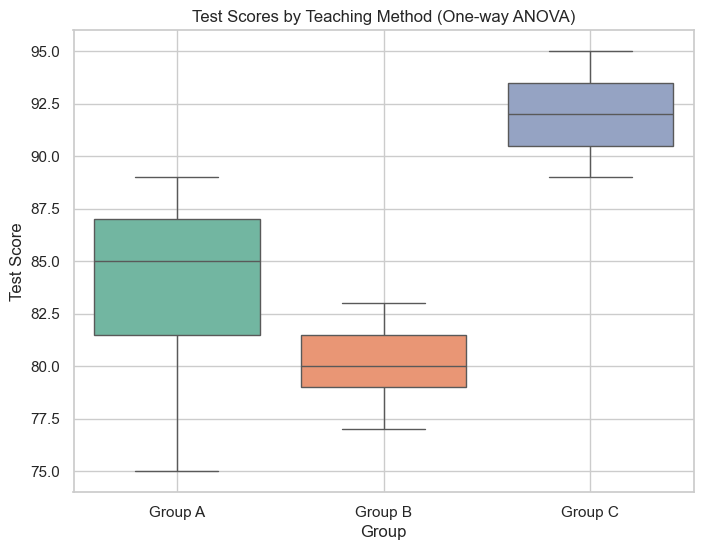

In [27]:
#Q18. Perform a one-way ANOVA test using Python to compare the means of different groups and plot the results.?
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

# Sample data for 3 groups
group_A = [85, 86, 88, 75, 78, 85, 89]
group_B = [79, 81, 83, 77, 80, 79, 82]
group_C = [90, 92, 94, 91, 93, 89, 95]

# One-way ANOVA test
f_statistic, p_value = stats.f_oneway(group_A, group_B, group_C)

print("F-Statistic:", f_statistic)
print("P-Value:", p_value)

# Combine data for visualization
data = group_A + group_B + group_C
groups = (['Group A'] * len(group_A) +
          ['Group B'] * len(group_B) +
          ['Group C'] * len(group_C))

# Plotting
plt.figure(figsize=(8, 6))
sns.boxplot(x=groups, y=data, palette='Set2')
plt.title("Test Scores by Teaching Method (One-way ANOVA)")
plt.xlabel("Group")
plt.ylabel("Test Score")
plt.grid(True)
plt.show()



In [29]:
#Q19. Write a Python function to check the assumptions (normality, Independdenca, a nd equal variance) for ANOVA?
import pandas as pd
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.stats.anova import anova_lm
from statsmodels.formula.api import ols
from statsmodels.stats.stattools import durbin_watson

def check_anova_assumptions(data, response_col, group_col):
    """
    Check ANOVA assumptions: normality, independence, and equal variance.
    
    Parameters:
        data (pd.DataFrame): The dataset containing the variables.
        response_col (str): Name of the dependent variable.
        group_col (str): Name of the independent (categorical) variable.

    Returns:
        None (prints and plots results)
    """
    print("✅ Checking ANOVA Assumptions\n")

    # 1. Fit the ANOVA model
    model = ols(f'{response_col} ~ C({group_col})', data=data).fit()
    residuals = model.resid
    fitted_vals = model.fittedvalues

    # 2. Normality of residuals
    print("🔹 Shapiro-Wilk Test for Normality:")
    shapiro_test = stats.shapiro(residuals)
    print(f"Statistic = {shapiro_test.statistic:.4f}, p-value = {shapiro_test.pvalue:.4f}")
    if shapiro_test.pvalue > 0.05:
        print("✅ Residuals appear normally distributed.\n")
    else:
        print("❌ Residuals may not be normally distributed.\n")

    # Q-Q plot
    sm.qqplot(residuals, line='45')
    plt.title("Q-Q Plot for Normality")
    plt.show()

    # 3. Independence (for time series, use Durbin-Watson)
    print("🔹 Durbin-Watson Test for Independence:")
    dw = durbin_watson(residuals)
    print(f"Durbin-Watson statistic: {dw:.4f}")
    if 1.5 < dw < 2.5:
        print("✅ Residuals appear to be independent.\n")
    else:
        print("❌ Residuals may not be independent.\n")

    # 4. Equal variances - Levene’s Test
    print("🔹 Levene’s Test for Homogeneity of Variances:")
    grouped_data = [group[response_col].values for name, group in data.groupby(group_col)]
    levene_test = stats.levene(*grouped_data)
    print(f"Statistic = {levene_test.statistic:.4f}, p-value = {levene_test.pvalue:.4f}")
    if levene_test.pvalue > 0.05:
        print("✅ Variances are equal across groups.\n")
    else:
        print("❌ Variances may not be equal across groups.\n")

    # Residuals vs Fitted plot
    plt.figure(figsize=(8, 5))
    sns.residplot(x=fitted_vals, y=residuals, lowess=True, line_kws={'color': 'red'})
    plt.xlabel("Fitted values")
    plt.ylabel("Residuals")
    plt.title("Residuals vs Fitted Plot")
    plt.axhline(0, linestyle='--', color='black')
    plt.show()



                           sum_sq    df          F    PR(>F)
C(FactorA)              45.375000   1.0   6.747212  0.017218
C(FactorB)             176.041667   1.0  26.177200  0.000053
C(FactorA):C(FactorB)    1.041667   1.0   0.154895  0.698065
Residual               134.500000  20.0        NaN       NaN


C:\Users\lalit\AppData\Local\Temp\ipykernel_1076\3460005004.py:19: FutureWarning: 

The `errwidth` parameter is deprecated. And will be removed in v0.15.0. Pass `err_kws={'linewidth': 1}` instead.

  sns.pointplot(data=data, x='FactorA', y='Score', hue='FactorB', dodge=True, markers=['o', 's'], capsize=.1, errwidth=1, palette='colorblind')


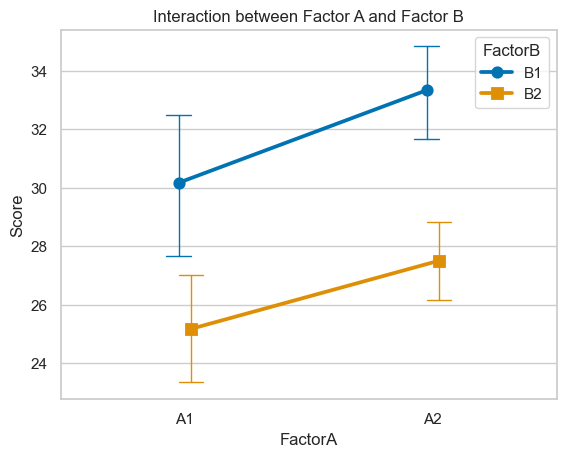

In [30]:
#Q20. Perform a two-way ANOVA test using Python to study the interaction between two tactors and visualize the results.?
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.formula.api import ols
# Sample data
data = pd.DataFrame({
    'FactorA': np.repeat(['A1', 'A2'], 12),
    'FactorB': np.tile(np.repeat(['B1', 'B2'], 6), 2),
    'Score': [25, 30, 28, 32, 35, 31, 22, 26, 24, 27, 29, 23,
              30, 34, 32, 35, 36, 33, 26, 28, 27, 29, 30, 25]
})
model = ols('Score ~ C(FactorA) + C(FactorB) + C(FactorA):C(FactorB)', data=data).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print(anova_table)
# Interaction plot
sns.pointplot(data=data, x='FactorA', y='Score', hue='FactorB', dodge=True, markers=['o', 's'], capsize=.1, errwidth=1, palette='colorblind')
plt.title("Interaction between Factor A and Factor B")
plt.show()






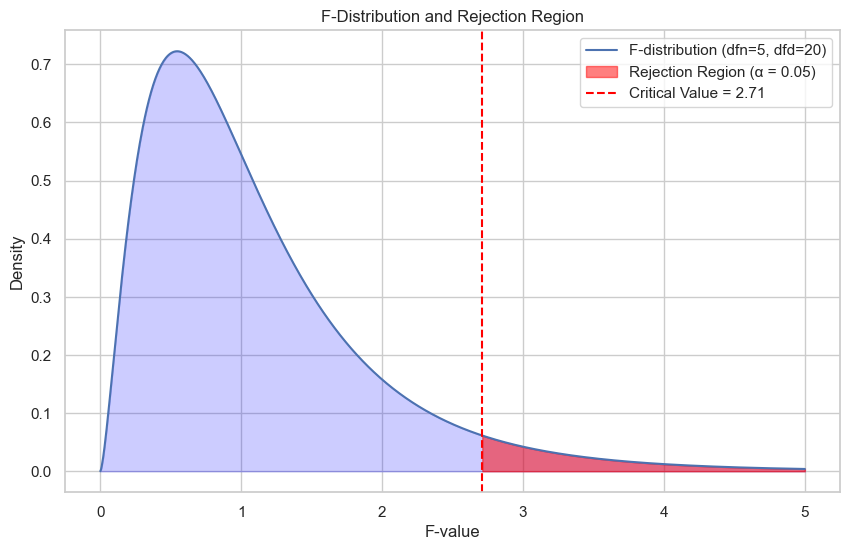

In [31]:
#Q21, Write a Python program to visualize the F-distribution and discuss its use in hypothesis testing?
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import f

# Degrees of freedom for numerator and denominator
dfn = 5   # degrees of freedom numerator
dfd = 20  # degrees of freedom denominator

# Generate x values
x = np.linspace(0, 5, 1000)
y = f.pdf(x, dfn, dfd)  # F-distribution PDF

# Plot the F-distribution
plt.figure(figsize=(10, 6))
plt.plot(x, y, 'b-', label=f'F-distribution (dfn={dfn}, dfd={dfd})')
plt.fill_between(x, y, alpha=0.2, color='blue')

# Critical value for alpha = 0.05 (one-tailed test)
alpha = 0.05
f_critical = f.ppf(1 - alpha, dfn, dfd)

# Shade the rejection region
x_fill = np.linspace(f_critical, x.max(), 300)
plt.fill_between(x_fill, f.pdf(x_fill, dfn, dfd), color='red', alpha=0.5, label=f'Rejection Region (α = {alpha})')

# Plot formatting
plt.title('F-Distribution and Rejection Region')
plt.xlabel('F-value')
plt.ylabel('Density')
plt.axvline(f_critical, color='red', linestyle='--', label=f'Critical Value = {f_critical:.2f}')
plt.legend()
plt.grid(True)
plt.show()



F-statistic: 14.011596203473228
p-value: 5.3078891894718356e-06


C:\Users\lalit\AppData\Local\Temp\ipykernel_1076\768944067.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='group', y='score', data=data, palette='Set2')


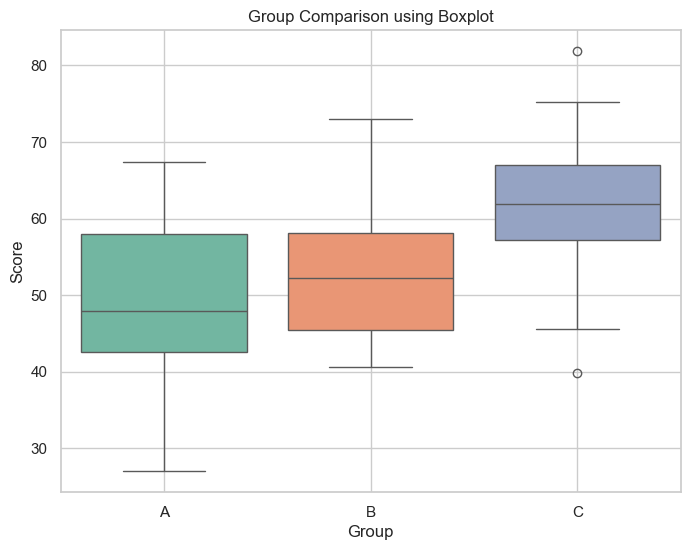

In [34]:
#Q22. Perform a one-way ANOVA test in Python and visualize the results with boxplets to compare group means.?
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
# Example: Three groups with numerical values
np.random.seed(1)
group_A = np.random.normal(50, 10, 30)
group_B = np.random.normal(52, 10, 30)
group_C = np.random.normal(60, 10, 30)

# Combine into a DataFrame
data = pd.DataFrame({
    'score': np.concatenate([group_A, group_B, group_C]),
    'group': ['A']*30 + ['B']*30 + ['C']*30
})
# One-way ANOVA using scipy
f_stat, p_value = stats.f_oneway(group_A, group_B, group_C)

print("F-statistic:", f_stat)
print("p-value:", p_value)
plt.figure(figsize=(8, 6))
sns.boxplot(x='group', y='score', data=data, palette='Set2')
plt.title('Group Comparison using Boxplot')
plt.xlabel('Group')
plt.ylabel('Score')
plt.grid(True)
plt.show()



In [33]:
#Q23, Simulate random data fron a normal distribution, then perform hypothesis testing to evaluate the means.?
import numpy as np
import scipy.stats as stats

# Set random seed for reproducibility
np.random.seed(42)

# Simulate 100 values from N(μ=50, σ=10)
data = np.random.normal(loc=50, scale=10, size=100)

# View basic summary
print(f"Sample Mean: {np.mean(data):.2f}")
print(f"Sample Std Dev: {np.std(data, ddof=1):.2f}")
# Perform t-test
t_stat, p_value = stats.ttest_1samp(data, popmean=50)

print(f"T-Statistic: {t_stat:.2f}")
print(f"P-Value: {p_value:.4f}")
alpha = 0.05  # Significance level

if p_value < alpha:
    print("Reject the null hypothesis: The mean is significantly different from 50.")
else:
    print("Fail to reject the null hypothesis: No significant difference in mean.")


Sample Mean: 48.96
Sample Std Dev: 9.08
T-Statistic: -1.14
P-Value: 0.2556
Fail to reject the null hypothesis: No significant difference in mean.


In [35]:
#Q24. Perform a hypothesis test for population variance using a Chi-square distribution and interpret the results.?
import scipy.stats as stats

# Given values
n = 30                       # sample size
sample_variance = 6.25      # s²
hypothesized_variance = 4   # σ₀²
alpha = 0.05

# Chi-square test statistic
chi2_stat = (n - 1) * sample_variance / hypothesized_variance

# Degrees of freedom
df = n - 1

# Critical value for right-tailed test
chi2_critical = stats.chi2.ppf(1 - alpha, df)

# p-value
p_value = 1 - stats.chi2.cdf(chi2_stat, df)

# Results
print(f"Chi-square Statistic: {chi2_stat:.4f}")
print(f"Critical Value: {chi2_critical:.4f}")
print(f"P-value: {p_value:.4f}")

# Conclusion
if chi2_stat > chi2_critical:
    print("Reject the null hypothesis: Evidence suggests the variance is greater than 4.")
else:
    print("Fail to reject the null hypothesis: Not enough evidence to suggest variance is greater than 4.")


Chi-square Statistic: 45.3125
Critical Value: 42.5570
P-value: 0.0274
Reject the null hypothesis: Evidence suggests the variance is greater than 4.


In [36]:
#Q25. Write a Python script to perfom a Z-test for comparing proportions between two datasets or groups.?
import math
from statsmodels.stats.proportion import proportions_ztest

# Sample data
x1 = 45  # successes in group 1
n1 = 100  # total trials in group 1

x2 = 30  # successes in group 2
n2 = 100  # total trials in group 2

# Combine successes and observations
successes = [x1, x2]
observations = [n1, n2]

# Perform the Z-test
z_stat, p_value = proportions_ztest(successes, observations)

# Print the results
print("Z-statistic:", round(z_stat, 4))
print("P-value:", round(p_value, 4))

# Interpretation
alpha = 0.05
if p_value < alpha:
    print("❌ Reject the null hypothesis: Proportions are significantly different.")
else:
    print("✅ Fail to reject the null hypothesis: No significant difference in proportions.")



Z-statistic: 2.1909
P-value: 0.0285
❌ Reject the null hypothesis: Proportions are significantly different.


In [ ]:
#Q26. Implement an F-test for comparing the variances of two datasets, then Interpret and visualize the results.?


In [ ]:
#Q27. Perform a Chi-square test for goodness of fit with simulcted data and analyze the results.?